![zadanie](tasks/4.png)

In [1]:
# zgodnie z zaleceniami przyjmuję częstotliwość próbkowania 48 kHZ

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from typing import Iterable

N = 2048
SAMPLE_FREQUENCY = 48_000

COMPONENT_AMPLITUDES = [0.1, 0.7, 0.9]
COMPONENT_FREQUENCIES = [3e3, 8e3, 11e3]

A_THRESHOLD = 1e-6

def sin_samples(amplitude: float, frequency: float,
                n_samples: int, sample_frequency: float):
    time_samples = 1 / sample_frequency * np.arange(n_samples)
    return amplitude * np.sin(2 * np.pi * frequency * time_samples)


def sin_sum_samples(amplitudes: Iterable[float], frequencies: Iterable[float],
                    n_samples: int, sample_frequency: float):
    return sum(
        sin_samples(amplitude, frequency, n_samples, sample_frequency)
        for amplitude, frequency in zip(amplitudes, frequencies)
    )



In [2]:
def plot(signal: np.ndarray):
    fig, (ax_1, ax_2) = plt.subplots(2, 1)
    fig.set_size_inches((16, 8))
    fig.suptitle(f"sygnał $s$")

    ax_1.plot(signal[:100])
    ax_1.set_title("próbki sygnału (pierwsze 100)")

    s_fft = np.fft.fft(signal) / N

    # filter values close to 0
    s_amplitude_spc = np.abs(s_fft)
    siginificance_mask = s_amplitude_spc > A_THRESHOLD
    s_amplitude_spc_filtered = s_amplitude_spc[siginificance_mask]
    x = np.arange(len(s_amplitude_spc))[siginificance_mask]

    s_power_spc = s_amplitude_spc_filtered ** 2
    
    ax_2.stem(x, s_power_spc)
    ax_2.set_title("widmowa gęstość mocy")
    ax_2.set_xlim((0, ax_2.get_xlim()[1]))

    fig.tight_layout()
    plt.show()
    plt.close()


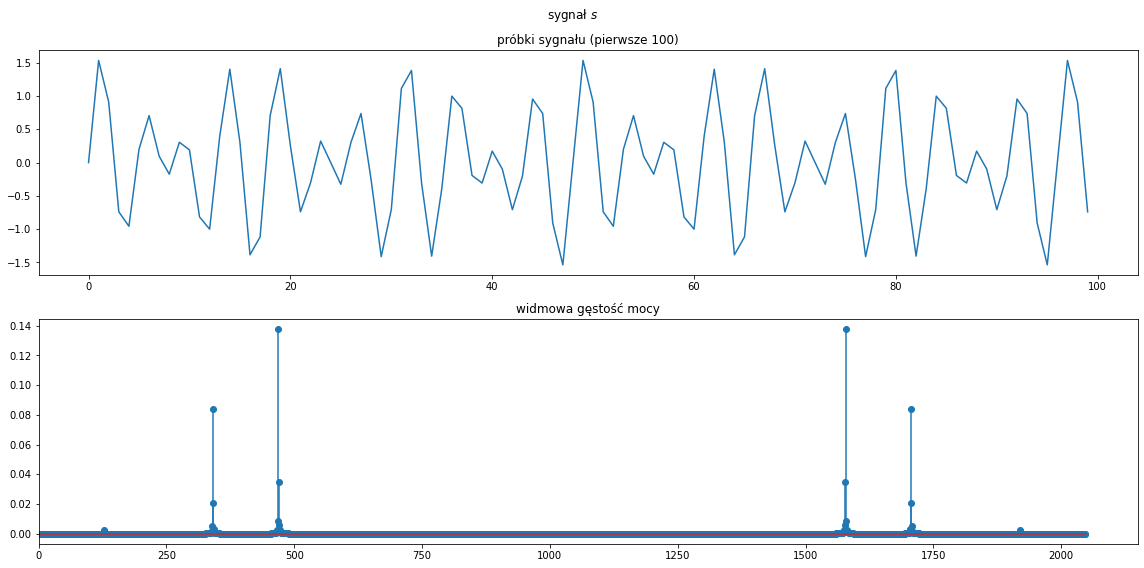

In [3]:
s = sin_sum_samples(COMPONENT_AMPLITUDES, COMPONENT_FREQUENCIES,
                    N, SAMPLE_FREQUENCY)

plot(s)

Obserwacje:
* widać efekt zjawiska przecieku widma
* pomimo zastosowania filtracji składowych widma o małej aplitudzie, prawie każda składowa jest widoczna na wykresie

Efekt ten wynika z tego, że nie wszystkie składowe częstotliwości sygnału są podzielne przez rozdzielczość dyskretyzacji częstotliwości transformaty DFT.

$$\Delta f = \frac{f_s}{N} = \frac{48000}{2048} = 23.4375$$
$$\frac{f_1}{\Delta f} = 128$$
$$\frac{f_2}{\Delta f} = 341 \frac{1}{3}$$
$$\frac{f_3}{\Delta f} = 369 \frac{1}{3}$$

Jak widać częstotliwości $f_2$ i $f_3$ nie dzielą się przez $\Delta f$. Oznacza to że nie można ich zareprezentować w dokładny sposób stosując taką dyskretyzację częstotliwości.

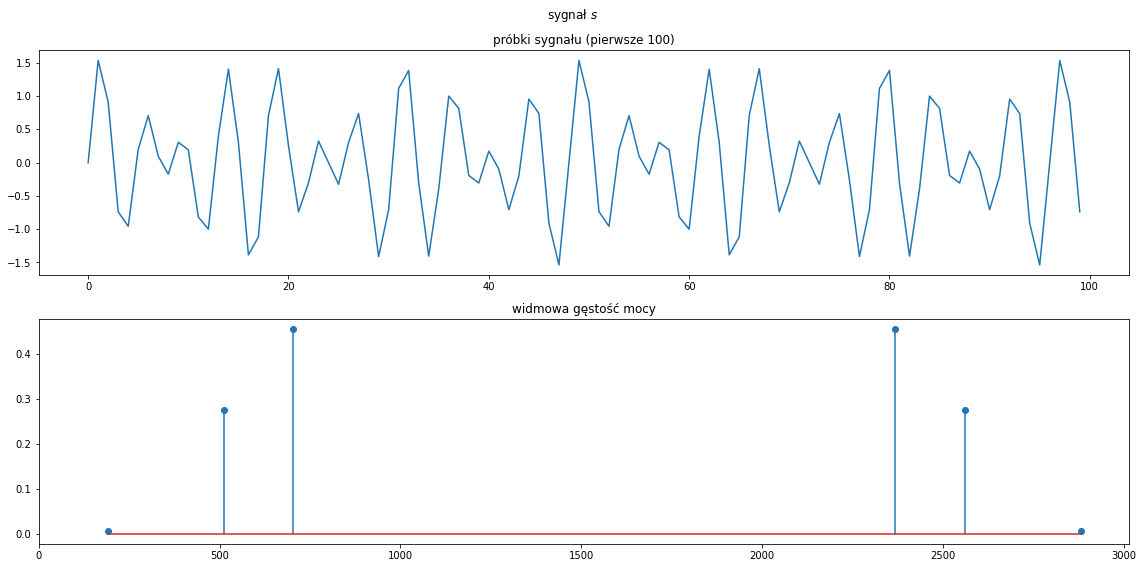

In [4]:
s = sin_sum_samples(COMPONENT_AMPLITUDES, COMPONENT_FREQUENCIES,
                3 / 2 * N, SAMPLE_FREQUENCY)

plot(s)


Obserwacje:
* tym razem widać tylko 3 prążki - dokładnie tyle ile składowych częstotliwości w sygnale
* w związku z tym nie ma efektu przecieku widma

Różnica w stosunku do poprzedniego przykładu jest w tym, że tym razem częstotliwości składowe sygnału dzielą się przez rozdzielczość dyskretyzacji częstotliwości transformaty DFT.

$$\Delta f = \frac{f_s}{\frac{3}{2} N} = \frac{48000}{3072} = 15.625$$
$$\frac{f_1}{\Delta f} = 192$$
$$\frac{f_2}{\Delta f} = 512$$
$$\frac{f_3}{\Delta f} = 704$$

Częstotliwości te dokładnie odpowiadają wartościom $k$, dla których prążki na wykresie widmowej gęstości mocy są widoczne.
